## TIME SERIES ANALYSIS 


    Importing the cleaned dataset with no Null values and preprocessed data into a pandas Dataframe.

In [1]:
import pandas as pd 
#loading the data from the dataset to a pandas Dataframe called "cd".
cd = pd.read_csv("cleaned_data.csv")

#Sample check of the data loaded.
cd.head()

,DATE OCC,TIME OCC,AREA,AREA NAME,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Premis Cd,...,LON,Crime Description,Severity_Crime,Weapon Description,Severity_Weapon,Premise Description,Severity_Premise,Severity,Hour,Minute
0,03-01-2020,21:00,7,Wilshire,1,510,VEHICLE - STOLEN,0,M,101.0,...,-118.3506,Property Crimes,7,No Weapon,0.0,Transportation,5.0,4.5,21,0
1,02-08-2020,18:00,1,Central,1,330,BURGLARY FROM VEHICLE,47,M,128.0,...,-118.2628,Property Crimes,7,No Weapon,0.0,Transportation,5.0,4.5,18,0
2,11-04-2020,17:00,3,Southwest,1,480,BIKE - STOLEN,19,X,502.0,...,-118.3002,Property Crimes,7,No Weapon,0.0,Residential,7.0,4.9,17,0
3,03-10-2020,20:00,9,Van Nuys,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,405.0,...,-118.4387,Property Crimes,7,No Weapon,0.0,Business/Commercial,6.0,4.7,20,0
4,08-17-2020,12:00,6,Hollywood,2,354,THEFT OF IDENTITY,28,M,102.0,...,-118.3277,Property Crimes,7,No Weapon,0.0,Transportation,5.0,4.5,12,0


In [2]:
#Printing the cloumn names.
print(cd.columns)

Index(['DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Part 1-2', 'Crm Cd',
       'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status Desc', 'LOCATION', 'LAT',
       'LON', 'Crime Description', 'Severity_Crime', 'Weapon Description',
       'Severity_Weapon', 'Premise Description', 'Severity_Premise',
       'Severity', 'Hour', 'Minute'],
      dtype='object')








***********************************************************************************************************************************
    Plotting the Average Severity by Crime Type graph to understand the relevance of Severity scores againts the crimes happening in the city of Los Angels.

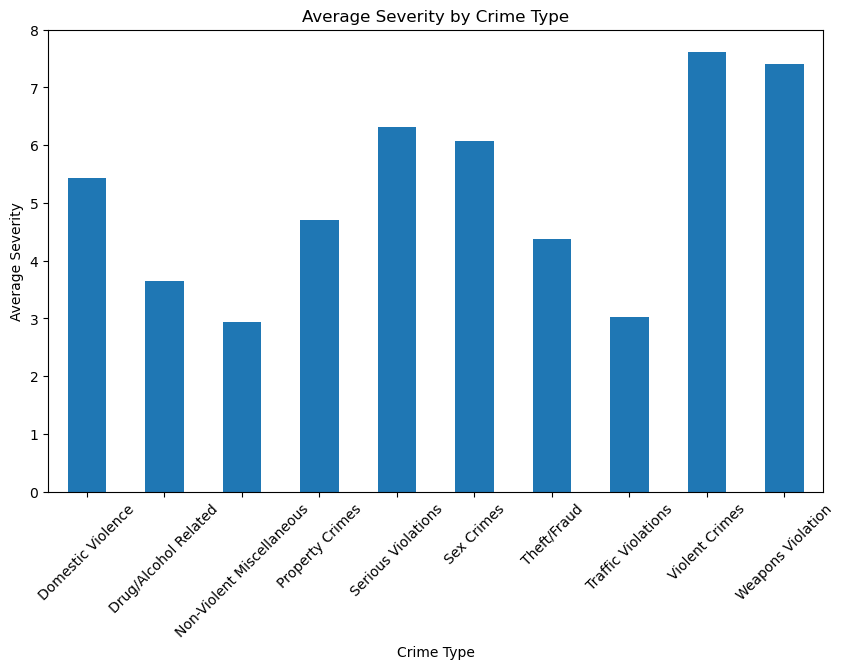

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
cd.groupby('Crime Description')['Severity'].mean().plot(kind='bar')
plt.title('Average Severity by Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Average Severity')
plt.xticks(rotation=45)
plt.show()


In [4]:
print(cd['Severity'].dtype)

float64


***********************************************************************************************************************************
     Sorting the dataset by DATE OCC column to be able to catagorise the data into different months in several years.

In [5]:
cd['DATE OCC'] = pd.to_datetime(cd['DATE OCC'])

# Sort the DataFrame by the date column
df_sorted = cd.sort_values(by='DATE OCC')

# Print the sorted DataFrame
print(df_sorted)

         DATE OCC TIME OCC  AREA    AREA NAME  Part 1-2  Crm Cd  \
38471  2020-01-01    21:00    18    Southeast         1     210   
172356 2020-01-01    01:00    14      Pacific         2     624   
119256 2020-01-01    18:00     5       Harbor         2     812   
185572 2020-01-01    03:00    18    Southeast         1     350   
102842 2020-01-01    13:00    21      Topanga         1     330   
...           ...      ...   ...          ...       ...     ...   
871736 2024-02-05    10:00     4   Hollenbeck         1     230   
873982 2024-02-05    02:00    14      Pacific         1     510   
873168 2024-02-05    08:00    18    Southeast         1     510   
878464 2024-02-05    08:00    12  77th Street         1     510   
864653 2024-02-05    00:00     9     Van Nuys         1     210   

                                              Crm Cd Desc  Vict Age Vict Sex  \
38471                                             ROBBERY        59        M   
172356                           BA

***********************************************************************************************************************************
    The dataset has the information of crimes that happened from January 2020 to Febuary 2024. Since we do not have the data of crimes for the entire year 2024, we have decided to remove the data in the year 2024 and make the prediction of the average seveirty of cimes in 2024 using Time Series Analysis. 

In [6]:
#Sorting the data and storing it in a new Data frame called "df_filtered" to restrict the data until Dec, 2023. 
df_filtered = df_sorted[df_sorted['DATE OCC'] < '2024-01-01']

In [7]:
print(df_filtered)

         DATE OCC TIME OCC  AREA    AREA NAME  Part 1-2  Crm Cd  \
38471  2020-01-01    21:00    18    Southeast         1     210   
172356 2020-01-01    01:00    14      Pacific         2     624   
119256 2020-01-01    18:00     5       Harbor         2     812   
185572 2020-01-01    03:00    18    Southeast         1     350   
102842 2020-01-01    13:00    21      Topanga         1     330   
...           ...      ...   ...          ...       ...     ...   
692176 2023-12-31    23:00    21      Topanga         1     236   
692539 2023-12-31    01:00     1      Central         1     230   
692901 2023-12-31    20:00    10  West Valley         1     251   
692470 2023-12-31    02:00    16     Foothill         2     740   
692214 2023-12-31    17:00    20      Olympic         2     624   

                                              Crm Cd Desc  Vict Age Vict Sex  \
38471                                             ROBBERY        59        M   
172356                           BA

In [8]:
#Grouping the data into 12 months of an year from the sorted dataframe to a new dataframe called "grouped_data"
grouped_data = df_filtered.groupby([df_filtered['DATE OCC'].dt.month, df_filtered['DATE OCC'].dt.year])

grouped_df = pd.DataFrame()

#Concatenating the groups into the new DataFrame
for name, group in grouped_data:
    grouped_df = pd.concat([grouped_df, group])

#Resetting the index of the new DataFrame
grouped_df.reset_index(drop=True, inplace=True)

#Printing the new DataFrame
grouped_df.head()

,DATE OCC,TIME OCC,AREA,AREA NAME,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Premis Cd,...,LON,Crime Description,Severity_Crime,Weapon Description,Severity_Weapon,Premise Description,Severity_Premise,Severity,Hour,Minute
0,2020-01-01,21:00,18,Southeast,1,210,ROBBERY,59,M,102.0,...,-118.2652,Violent Crimes,10,Personal Weapons/Physical Force,4.0,Transportation,5.0,7.2,21,0
1,2020-01-01,01:00,14,Pacific,2,624,BATTERY - SIMPLE ASSAULT,26,F,101.0,...,-118.4492,Violent Crimes,10,Personal Weapons/Physical Force,4.0,Transportation,5.0,7.2,1,0
2,2020-01-01,18:00,5,Harbor,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,12,F,502.0,...,-118.3012,Domestic Violence,7,Personal Weapons/Physical Force,4.0,Residential,7.0,6.1,18,0
3,2020-01-01,03:00,18,Southeast,1,350,"THEFT, PERSON",30,F,122.0,...,-118.2630,Property Crimes,7,Personal Weapons/Physical Force,4.0,Transportation,5.0,5.7,3,0
4,2020-01-01,13:00,21,Topanga,1,330,BURGLARY FROM VEHICLE,0,M,101.0,...,-118.5754,Property Crimes,7,No Weapon,0.0,Transportation,5.0,4.5,13,0


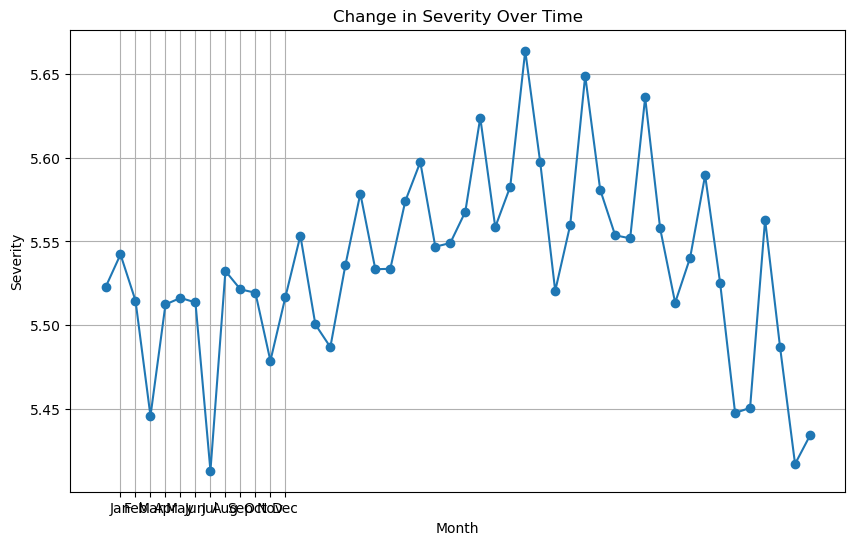

In [9]:
import matplotlib.pyplot as plt
severity_measure = grouped_data['Severity'].mean()  

if isinstance(severity_measure, pd.DataFrame):
    severity_measure = severity_measure.squeeze()
    
# Plot the severity measure over time
severity_measure.plot(figsize=(10, 6), marker='o', linestyle='-')
plt.title('Change in Severity Over Time')
plt.xlabel('Month')
plt.ylabel('Severity')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

***********************************************************************************************************************************
    Adding a new column called "Mointh" to segeregate data according to months of an year.

In [10]:
df_filtered['month'] = df_filtered['DATE OCC'].dt.month
df_filtered.head()

/var/folders/32/d10tw0x10ngd3fsg70yr4v9m0000gn/T/ipykernel_75787/1787656941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['month'] = df_filtered['DATE OCC'].dt.month


,DATE OCC,TIME OCC,AREA,AREA NAME,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Premis Cd,...,Crime Description,Severity_Crime,Weapon Description,Severity_Weapon,Premise Description,Severity_Premise,Severity,Hour,Minute,month
38471,2020-01-01,21:00,18,Southeast,1,210,ROBBERY,59,M,102.0,...,Violent Crimes,10,Personal Weapons/Physical Force,4.0,Transportation,5.0,7.2,21,0,1
172356,2020-01-01,01:00,14,Pacific,2,624,BATTERY - SIMPLE ASSAULT,26,F,101.0,...,Violent Crimes,10,Personal Weapons/Physical Force,4.0,Transportation,5.0,7.2,1,0,1
119256,2020-01-01,18:00,5,Harbor,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,12,F,502.0,...,Domestic Violence,7,Personal Weapons/Physical Force,4.0,Residential,7.0,6.1,18,0,1
185572,2020-01-01,03:00,18,Southeast,1,350,"THEFT, PERSON",30,F,122.0,...,Property Crimes,7,Personal Weapons/Physical Force,4.0,Transportation,5.0,5.7,3,0,1
102842,2020-01-01,13:00,21,Topanga,1,330,BURGLARY FROM VEHICLE,0,M,101.0,...,Property Crimes,7,No Weapon,0.0,Transportation,5.0,4.5,13,0,1


***********************************************************************************************************************************
    Finding out the average seveirty scores of crimes according to months in different years and plotting the Average Severity score bby Month graph to get insights from the data.

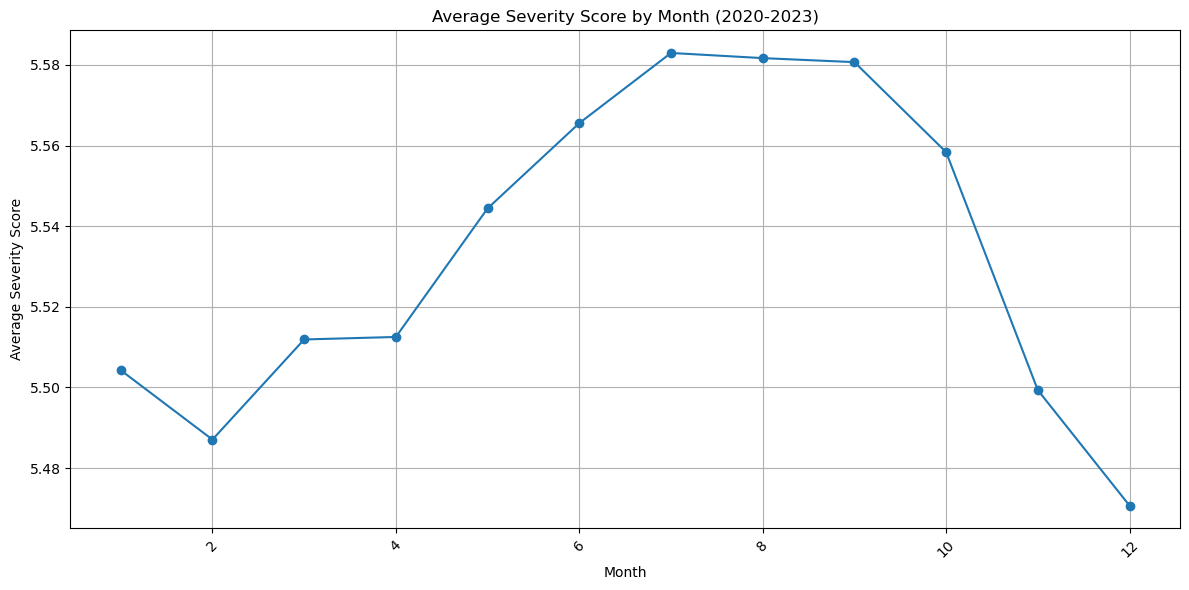

In [11]:
#Deriving the average severity score according to months of an year from the dataframe. 
monthly_avg_severity = df_filtered.groupby('month')['Severity'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_severity['month'], monthly_avg_severity['Severity'], marker='o', linestyle='-')
plt.title('Average Severity Score by Month (2020-2023)')
plt.xlabel('Month')
plt.ylabel('Average Severity Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  

plt.show()

In [12]:
#Renaming the monthy segeregated data of crime severity as incident_count
monthly_data = grouped_data.size().rename('incident_count')

In [13]:
monthly_data_df = pd.DataFrame({'DATE OCC': monthly_data.index.get_level_values(0), 
                                'DATE OCC.1': monthly_data.index.get_level_values(1), 
                                'incident_count': monthly_data.values})

In [14]:
#Printing the unique values in months and years from the dataframe.
print(monthly_data_df['DATE OCC'].unique())
print(monthly_data_df['DATE OCC.1'].unique())


[ 1  2  3  4  5  6  7  8  9 10 11 12]
[2020 2021 2022 2023]


In [15]:
# Creating a time series from the aggregated data
ts_index = pd.to_datetime(monthly_data_df['DATE OCC.1'].astype(str) + '-' + monthly_data_df['DATE OCC'].astype(str) + '-01')
ts_values = monthly_data_df['incident_count']
ts = pd.Series(ts_values.values, index=ts_index)


****************************************************************************************************************************************************************** 
    Plotting the Monthly Incident count graph to analyse the avergae number of crimes happening across several months of each year between Jan, 2020 and Dec, 2023.

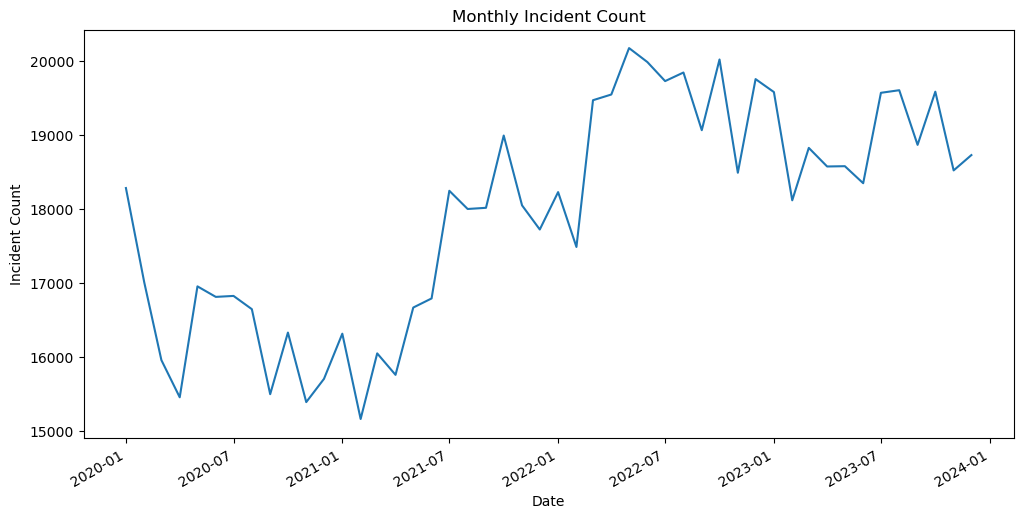

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
ts.plot()
plt.title('Monthly Incident Count')
plt.xlabel('Date')
plt.ylabel('Incident Count')
plt.show()


************************************************************************************************************************************************************         
    Performing Seasonal Decomposition to understand the Trend, Seasonality and Residuals of the data. 

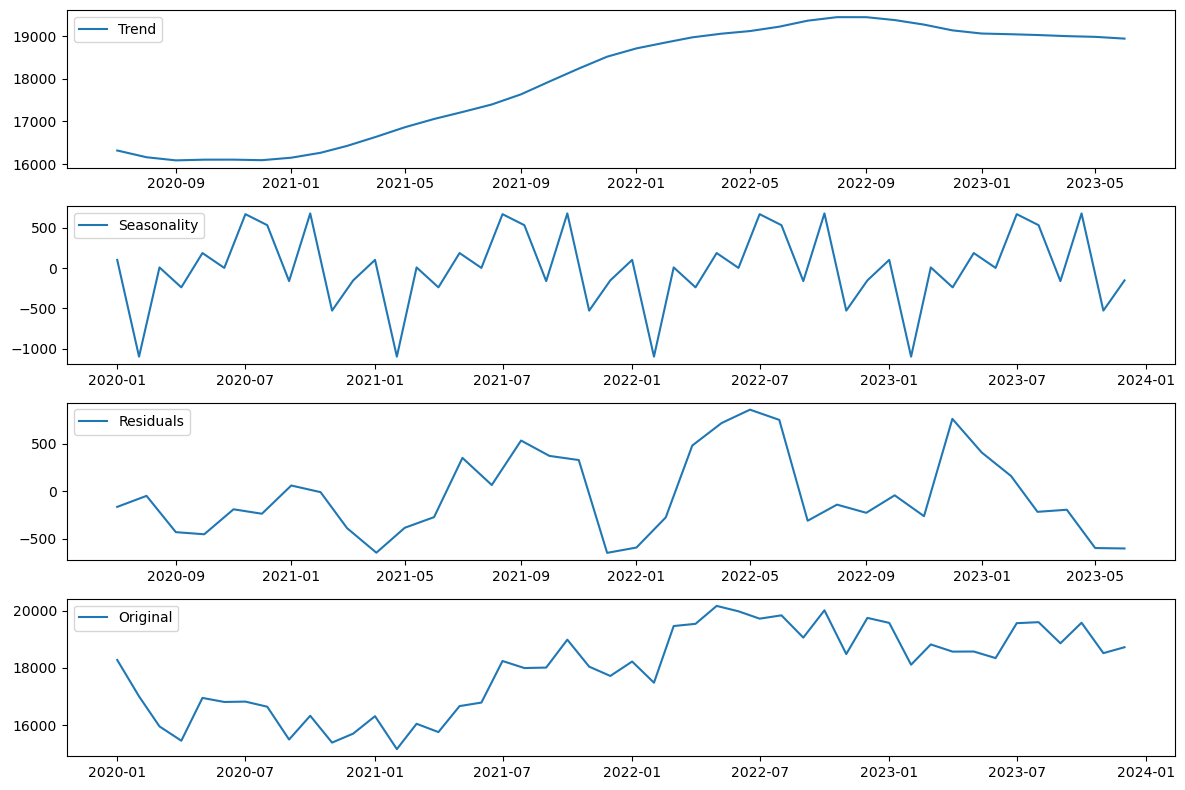

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose


ts.index = pd.to_datetime(ts.index)

ts = ts.asfreq('MS')

decomposition = seasonal_decompose(ts, model='additive')

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(ts, label='Original')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show(7326)


***********************************************************************************************************************************
     Using the Auto-Corelation and Partial Auto-Corelation functions to determin the Time Series model. 

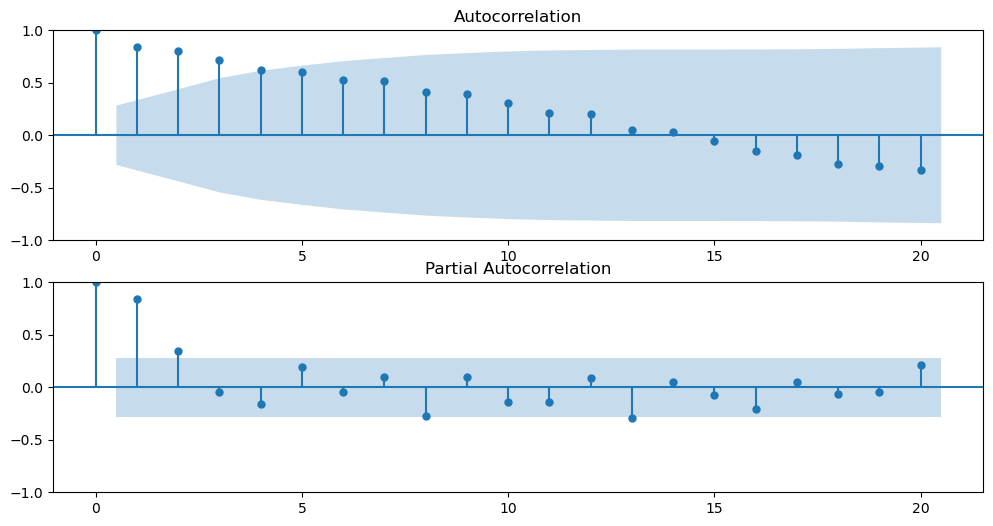

In [21]:
#Checking on ACF and PACF values
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(ts, ax=plt.gca(), lags=20)  
plt.subplot(212)
plot_pacf(ts, ax=plt.gca(), lags=20)  
plt.show()


*************************************************************************************************************************************
    Based on the obtained values from ACF and after analysing the Seasonality and Trend from the data, we choose ARIMA model from time series to predict the Average Incident counts across all the months in 2024. 

In [26]:
#Implementing the ARIMA model.
from statsmodels.tsa.arima.model import ARIMA
d = 0
p = 1
q = 1

#Fitting the ARIMA model
model = ARIMA(ts, order=(p, d, q))
fitted_model = model.fit()

residuals = fitted_model.resid
forecast_periods = 12  
forecast = fitted_model.forecast(steps=forecast_periods)

print("Forecasted values for the next 12 months:")
print(forecast)


Forecasted values for the next 12 months:
2024-01-01    18656.640270
2024-02-01    18600.001625
2024-03-01    18547.841362
2024-04-01    18499.805378
2024-05-01    18455.567569
2024-06-01    18414.827616
2024-07-01    18377.308945
2024-08-01    18342.756852
2024-09-01    18310.936771
2024-10-01    18281.632684
2024-11-01    18254.645653
2024-12-01    18229.792469
Freq: MS, Name: predicted_mean, dtype: float64


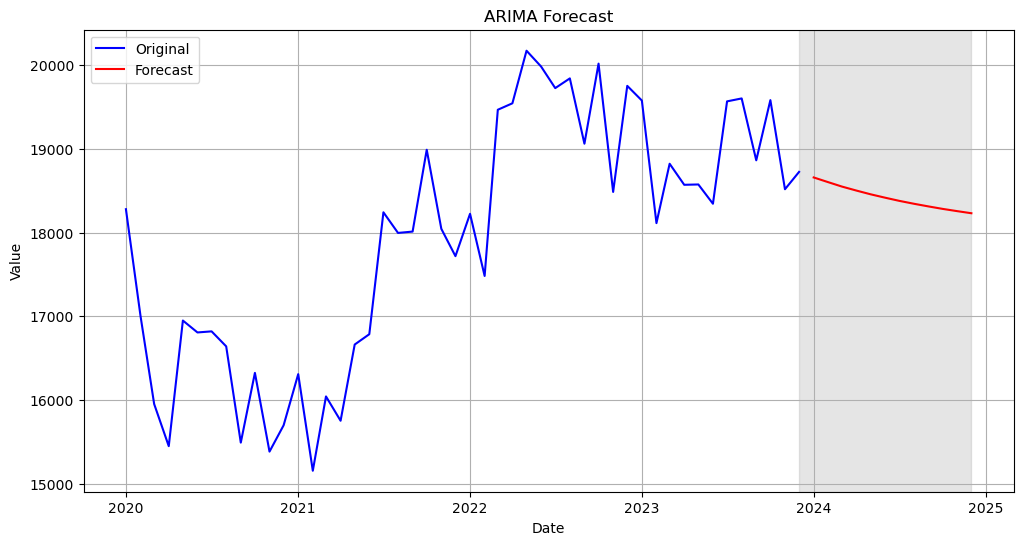

In [27]:
#Plotting the original time series
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Original', color='blue')

#Plotting the forecasted values
plt.plot(forecast, label='Forecast', color='red')

#Highlighting the forecasted period
plt.axvspan(ts.index[-1], forecast.index[-1], color='gray', alpha=0.2)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Forecast')

plt.legend()
plt.grid(True)
plt.show()

***************************************************************************************************************************************
    After carefully verifying the results obtained from ARIMA model and considering the ACF and also PACF values, there is a better chance for the SARIMA model in bringing out better results in predicting the Average Incident counts across all the months of 2024. 

/Users/db/Desktop/Anaconda/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.54804D+00    |proj g|=  3.55143D-01

At iterate    5    f=  3.40871D+00    |proj g|=  1.40044D-01

At iterate   10    f=  3.39626D+00    |proj g|=  3.50861D-04

At iterate   15    f=  3.39607D+00    |proj g|=  1.41187D-02

At iterate   20    f=  3.37522D+00    |proj g|=  1.75147D-01

At iterate   25    f=  3.32071D+00    |proj g|=  2.26232D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     32      1     0     0   

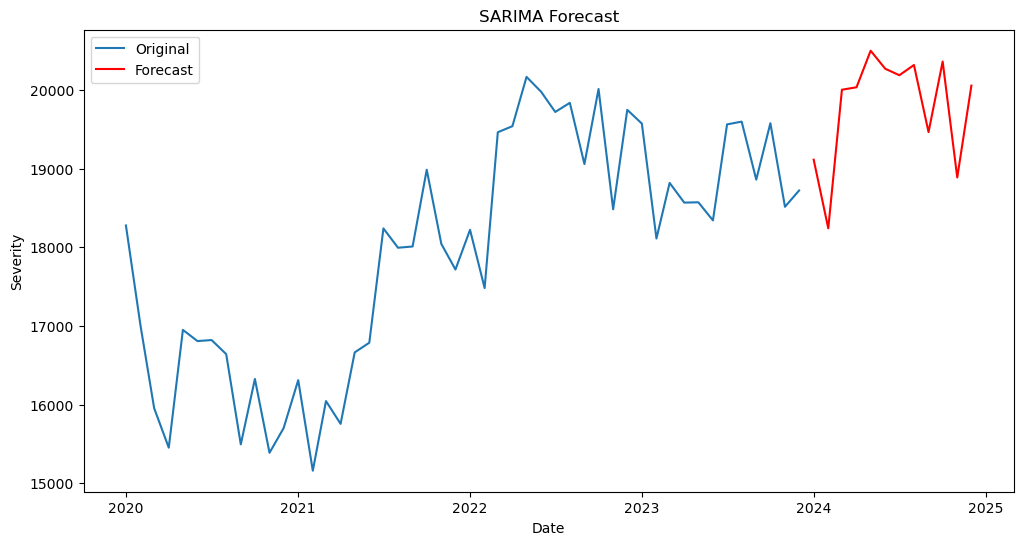

In [28]:
#Implementing the SARIMA model. 
from statsmodels.tsa.statespace.sarimax import SARIMAX


#Defining the SARIMA model parameters
order = (0, 1, 1)  
seasonal_order = (1, 1, 1, 12)  

model = SARIMAX(ts, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
result = model.fit()

#Forecasting future values
forecast = result.forecast(steps=12)  

plt.figure(figsize=(12, 6))
plt.plot(ts, label='Original')
plt.plot(forecast, label='Forecast', color='red')
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Severity')
plt.legend()
plt.show()

***********************************************************************************************************************************
    On comparing the resultant data from both ARIMA and SARIMA model we can conlude that SARIMA model has performed better in predicting the Severity of Crimes and the Average Incident counts of crimes across all the months of the year 2024 in Los Angels city.
